In [99]:
!pip install yfinance -q
!pip install plotly -q
!pip install snscrape -q
!pip install matplotlib -q
!pip install pandas -q
!pip install tqdm -q
!pip install --upgrade snscrape -q


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


In [100]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import yfinance as yf
import plotly.graph_objects as go  ## better display graphs
import snscrape.modules.twitter as sntwitter

In [101]:
## Example pulling Microsoft Stock

In [102]:
msft = yf.Ticker("MSFT")

In [105]:
hist = msft.history(period="max")

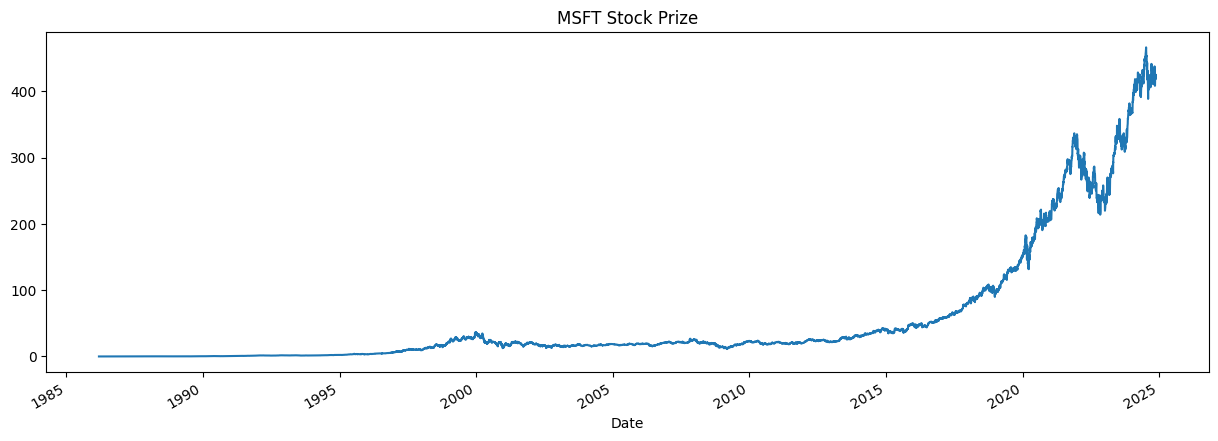

In [106]:
hist['Open'].plot(figsize=(15,5), title = "MSFT Stock Prize")
plt.show()

In [107]:
msft.balance_sheet

2024-06-30  \
Ordinary Shares Number                              7434000000.0   
Share Issued                                        7434000000.0   
Net Debt                                           33315000000.0   
Total Debt                                         67127000000.0   
Tangible Book Value                               121660000000.0   
...                                                          ...   
Cash Cash Equivalents And Short Term Investments   75531000000.0   
Other Short Term Investments                       57216000000.0   
Cash And Cash Equivalents                          18315000000.0   
Cash Equivalents                                    6744000000.0   
Cash Financial                                     11571000000.0   

                                                      2023-06-30  \
Ordinary Shares Number                              7432000000.0   
Share Issued                                        7432000000.0   
Net Debt                                           12533000000.0   
Total Debt                                         59965000000.0   
Tangible Book Value                               128971000000.0   
...                                                          ...   
Cash Cash Equivalents And Short Term Investments  111256000000.0   
Other Short Term Investments                       76552000000.0   
Cash And Cash Equivalents                          34704000000.0   
Cash Equivalents                                   26226000000.0   
Cash Financial                                      8478000000.0   

                                                      2022-06-30  \
Ordinary Shares Number                              7464000000.0   
Share Issued                                        7464000000.0   
Net Debt                                           35850000000.0   
Total Debt                                         61270000000.0   
Tangible Book Value                                87720000000.0   
...                                                          ...   
Cash Cash Equivalents And Short Term Investments  104749000000.0   
Other Short Term Investments                       90818000000.0   
Cash And Cash Equivalents                          13931000000.0   
Cash Equivalents                                    5673000000.0   
Cash Financial                                      8258000000.0   

                                                      2021-06-30  
Ordinary Shares Number                              7519000000.0  
Share Issued                                        7519000000.0  
Net Debt                                           43922000000.0  
Total Debt                                         67775000000.0  
Tangible Book Value                                84477000000.0  
...                                                          ...  
Cash Cash Equivalents And Short Term Investments  130256000000.0  
Other Short Term Investments                      116032000000.0  
Cash And Cash Equivalents                          14224000000.0  
Cash Equivalents                                    6952000000.0  
Cash Financial                                      7272000000.0  

[73 rows x 4 columns]

In [108]:
msft.calendar

{'Dividend Date': datetime.date(2024, 12, 11),
 'Ex-Dividend Date': datetime.date(2024, 11, 20),
 'Earnings Date': [datetime.date(2025, 1, 28), datetime.date(2025, 2, 3)],
 'Earnings High': 3.47,
 'Earnings Low': 3.08,
 'Earnings Average': 3.16286,
 'Revenue High': 70520000000,
 'Revenue Low': 68488700000,
 'Revenue Average': 68937174200}

In [109]:
## Pulling other stocks
## top 10 stocks to buy in 2024

In [110]:
stonks = ['MSFT','NVDA','GOOGL','META','JPM','XOM','MA','CRM','AMD','AXP','MS']


In [111]:
hists = {}
for s in stonks:
    tkr = yf.Ticker(s)
    history = tkr.history(period='10y')  ## pulling 10 year data
    hists[s] = history

In [112]:
## Plotting the stock prize

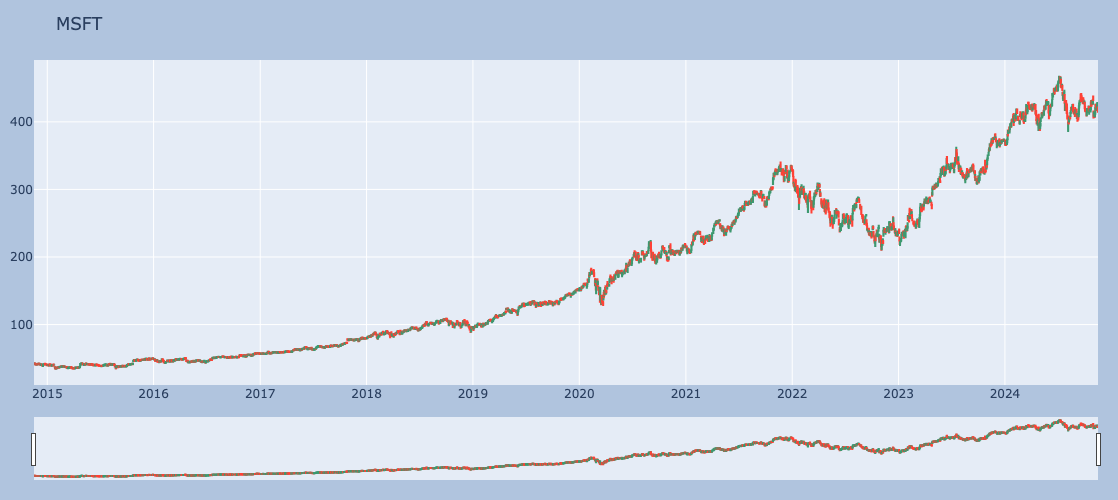

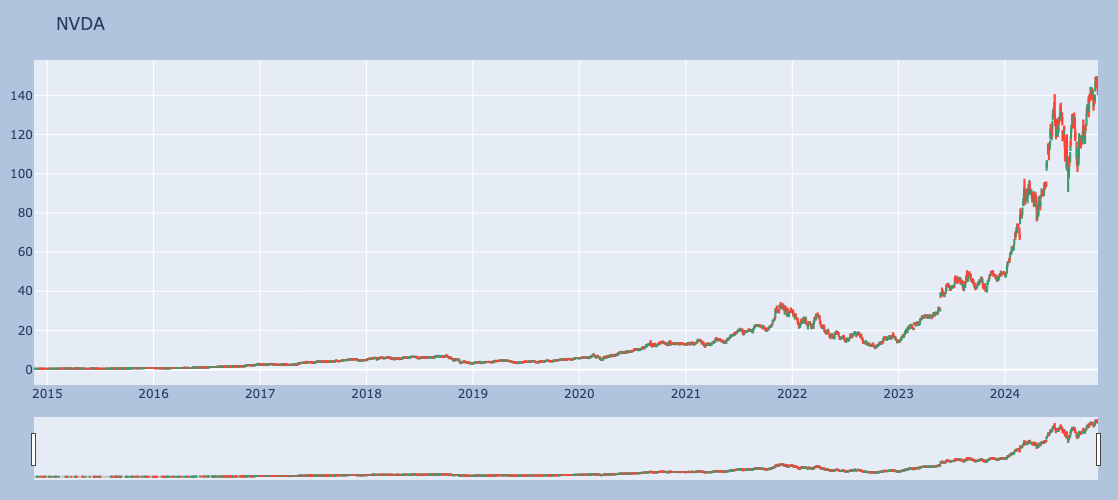

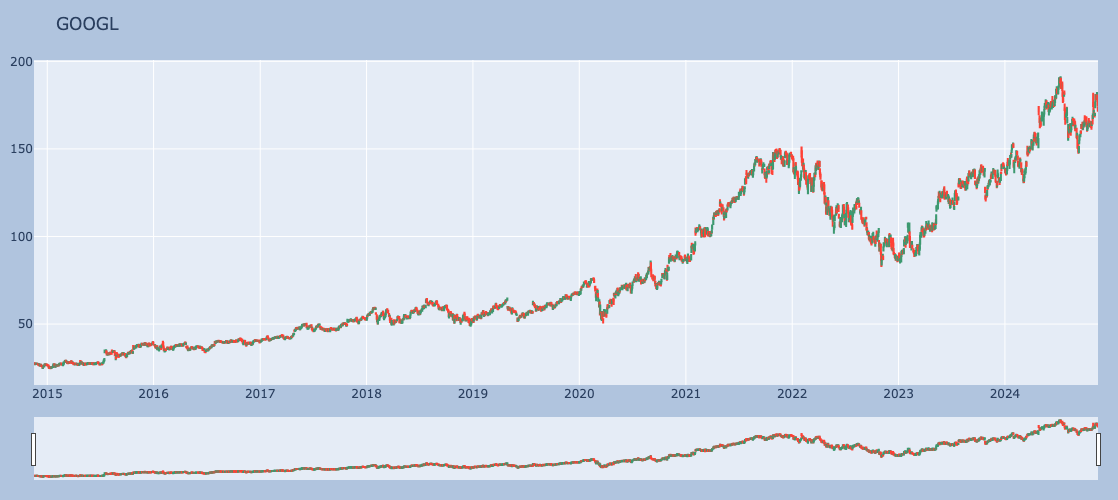

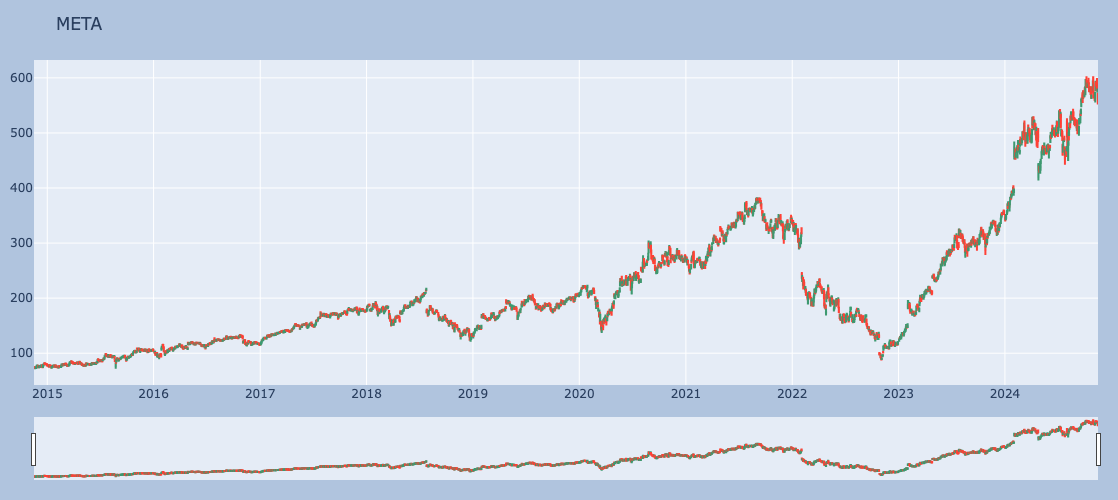

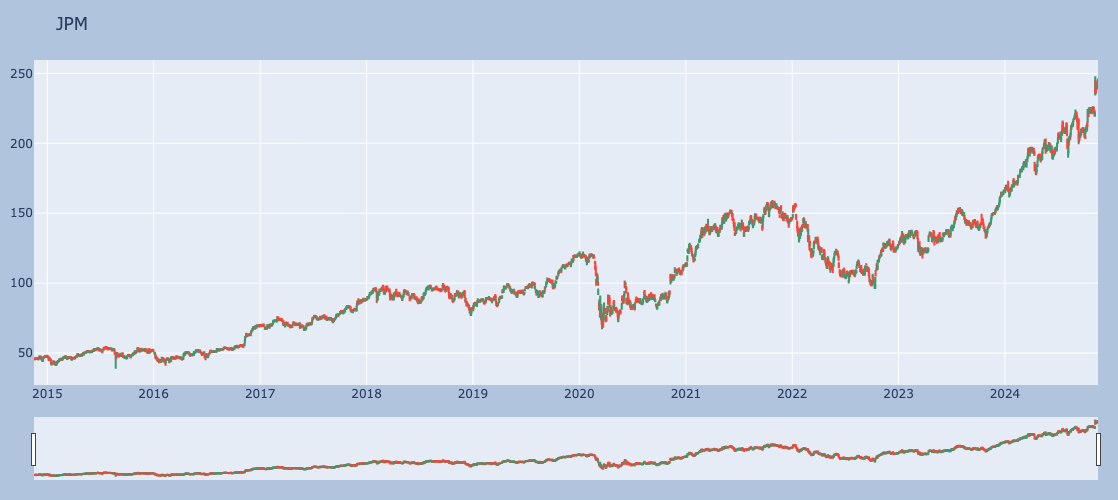

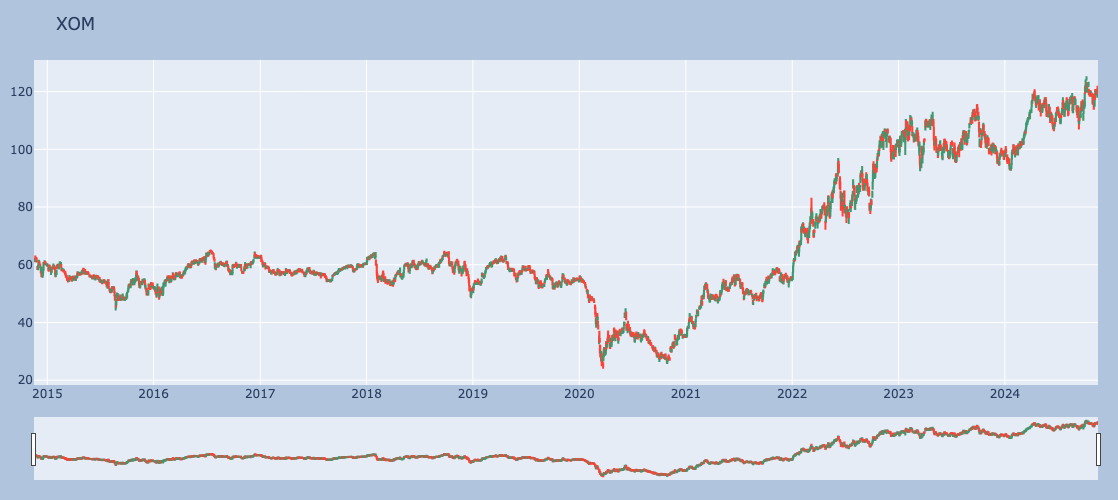

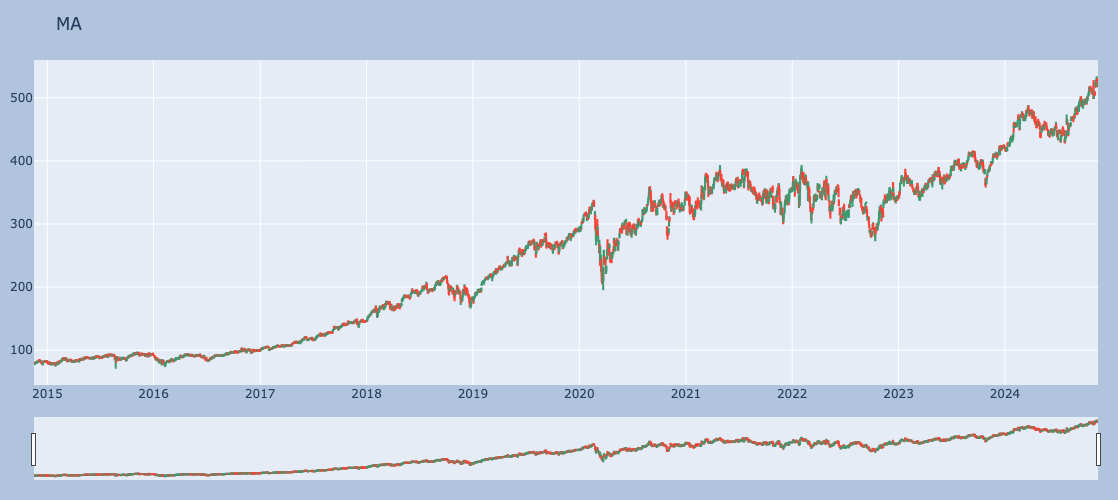

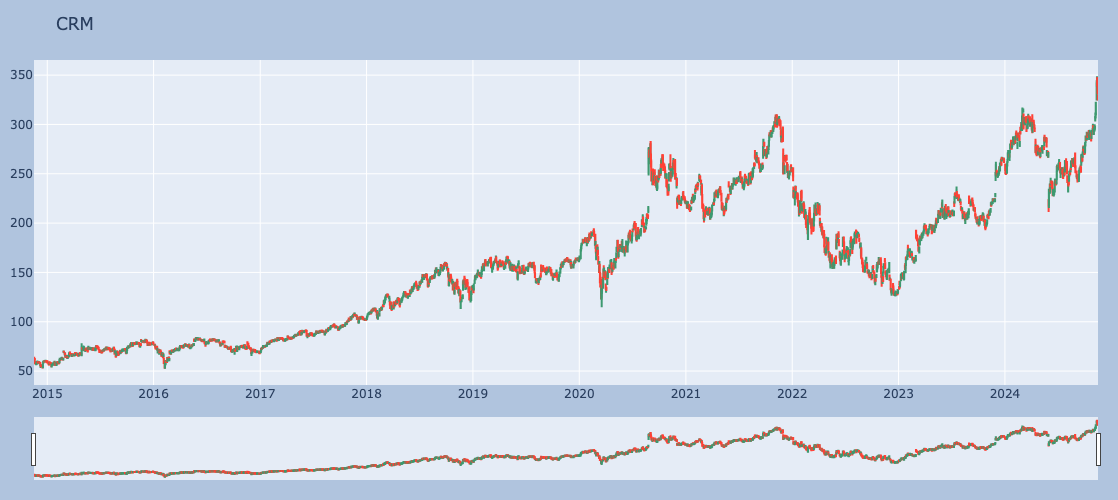

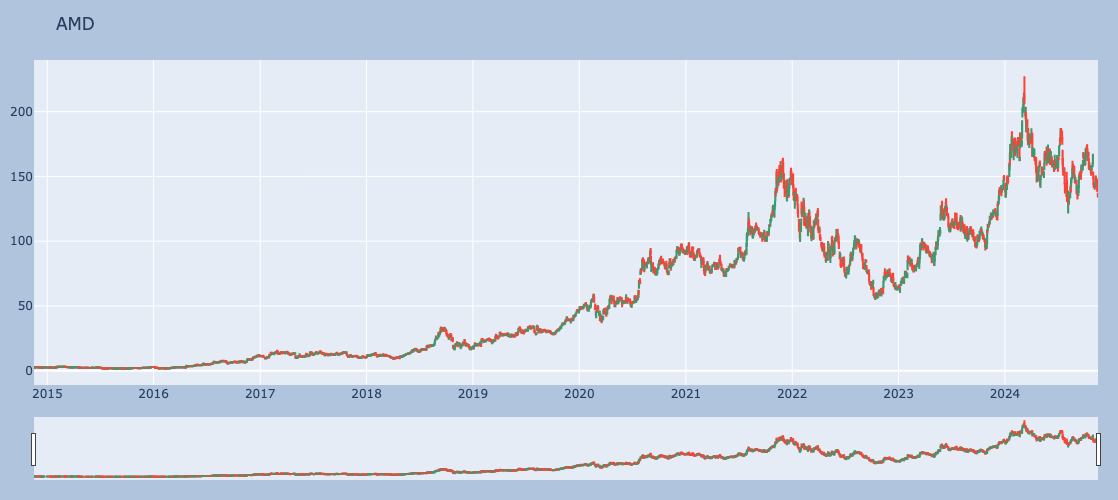

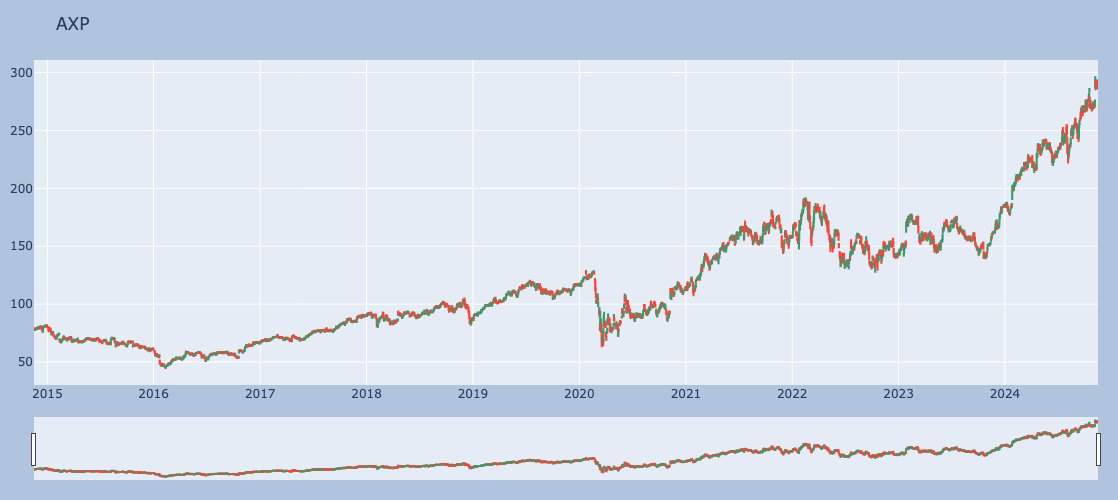

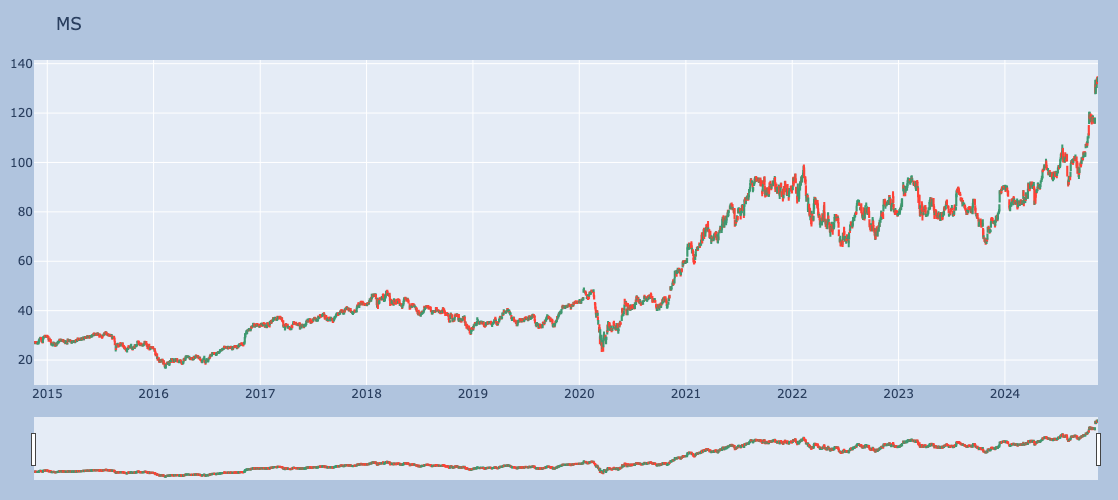

In [113]:
for stock in stonks:
    temp_df = hists[stock].copy()
    
    fig = go.Figure(
        data=[
            go.Candlestick(
                x = temp_df.index,
                open = temp_df["Open"],
                high = temp_df["High"],
                low = temp_df["Low"],
                close = temp_df["Close"],
            )
        ]
    )
    
    fig.update_layout(
        margin = dict(l=20, r=20, t=60, b=20),
        height = 500,
        paper_bgcolor = "LightSteelBlue",
        title = stock,
    )
    
    fig.show()

In [114]:
## Pulling tweets about stocks

In [115]:
hists["MSFT"].index.min()

Timestamp('2014-11-17 00:00:00-0500', tz='America/New_York')

In [95]:
stock = "MSFT"

In [96]:
## Do sentiment analysis